In [9]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Reading the raw dataframe
raw_df = pd.read_csv('../data/raw/raw_data.csv', index_col=0)
raw_df

,id,type,created_at,actor_id,repo_id
463520,27785656613,PushEvent,2023-03-17 02:48:22+00:00,76970935,326797979
1513625,27791965422,PushEvent,2023-03-17 09:36:45+00:00,41898282,592000389
1815966,27794235001,PushEvent,2023-03-17 11:14:17+00:00,53609030,615288394
3720195,27807630869,PushEvent,2023-03-17 21:46:33+00:00,88397873,567795504
2190387,27796768245,IssueCommentEvent,2023-03-17 13:08:03+00:00,77991816,197743848
...,...,...,...,...,...
1736469,27793650922,DeleteEvent,2023-03-17 10:48:37+00:00,88436206,243262424
3354201,27805522252,CreateEvent,2023-03-17 19:30:13+00:00,390675,615474484
3211768,27804636819,PushEvent,2023-03-17 18:40:39+00:00,338451,454422897
3003904,27803335450,PushEvent,2023-03-17 17:32:58+00:00,47548091,544234874


In [11]:
# Filter the data to remove the bot activities
raw_df['count'] = raw_df.groupby('actor_id')['actor_id'].transform('count')
filtered_df = raw_df.query("count >= 1 & count <= 30")
filtered_df = filtered_df.drop('count', axis=1)
filtered_df

,id,type,created_at,actor_id,repo_id
1815966,27794235001,PushEvent,2023-03-17 11:14:17+00:00,53609030,615288394
3720195,27807630869,PushEvent,2023-03-17 21:46:33+00:00,88397873,567795504
2190387,27796768245,IssueCommentEvent,2023-03-17 13:08:03+00:00,77991816,197743848
1747060,27793723698,PushEvent,2023-03-17 10:51:54+00:00,50041580,610155716
4007699,27808924883,PushEvent,2023-03-17 23:50:59+00:00,46442452,544386382
...,...,...,...,...,...
2342037,27797996719,PushEvent,2023-03-17 13:56:36+00:00,14265700,599944960
1736469,27793650922,DeleteEvent,2023-03-17 10:48:37+00:00,88436206,243262424
3354201,27805522252,CreateEvent,2023-03-17 19:30:13+00:00,390675,615474484
3211768,27804636819,PushEvent,2023-03-17 18:40:39+00:00,338451,454422897


In [12]:
# Pivot the data to the count of event for clustering
pivot_df = pd.pivot_table(filtered_df, values='id', index='actor_id', columns='type', aggfunc=len, fill_value=0)

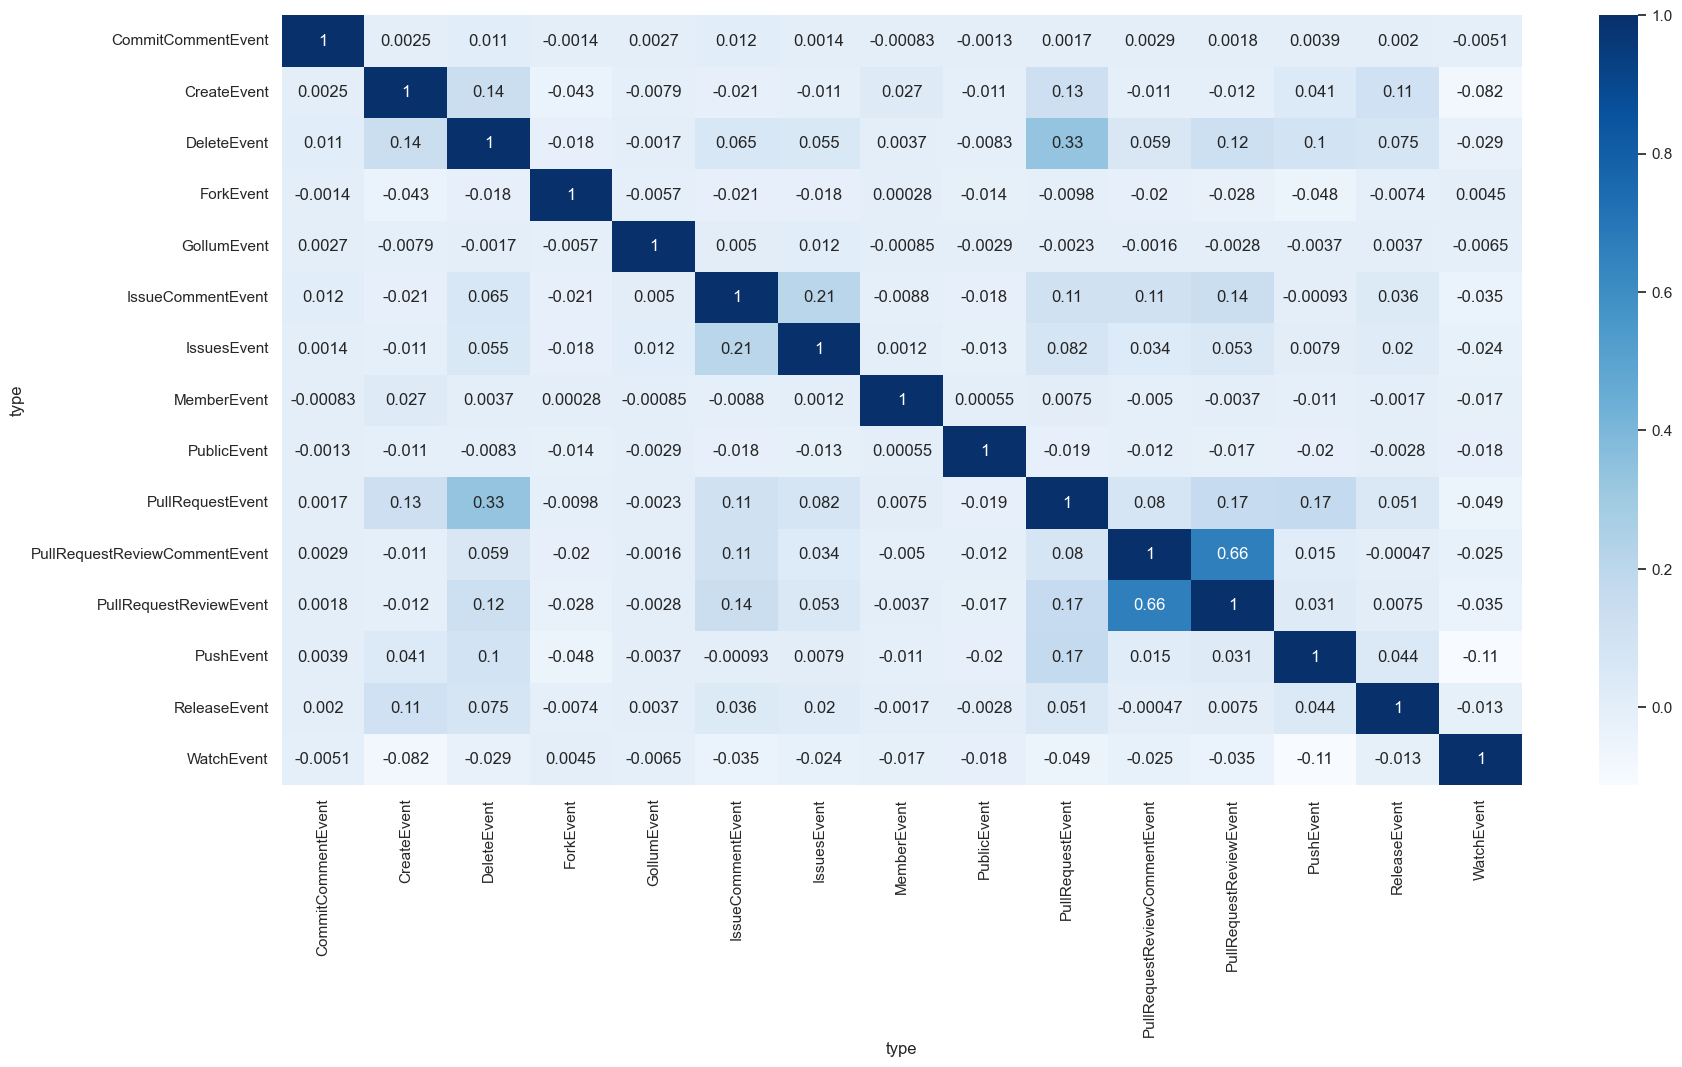

In [13]:
# Evaluate the hidden correlation to investigate probable 
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [14]:
# Feature reduction to avoid multicollinearity
pivot_df = pivot_df[['CreateEvent',
                     'ForkEvent',
                     'IssuesEvent',
                     'PullRequestEvent',
                     'PullRequestReviewEvent',
                     'PushEvent',
                     'ReleaseEvent',
                     'WatchEvent']]

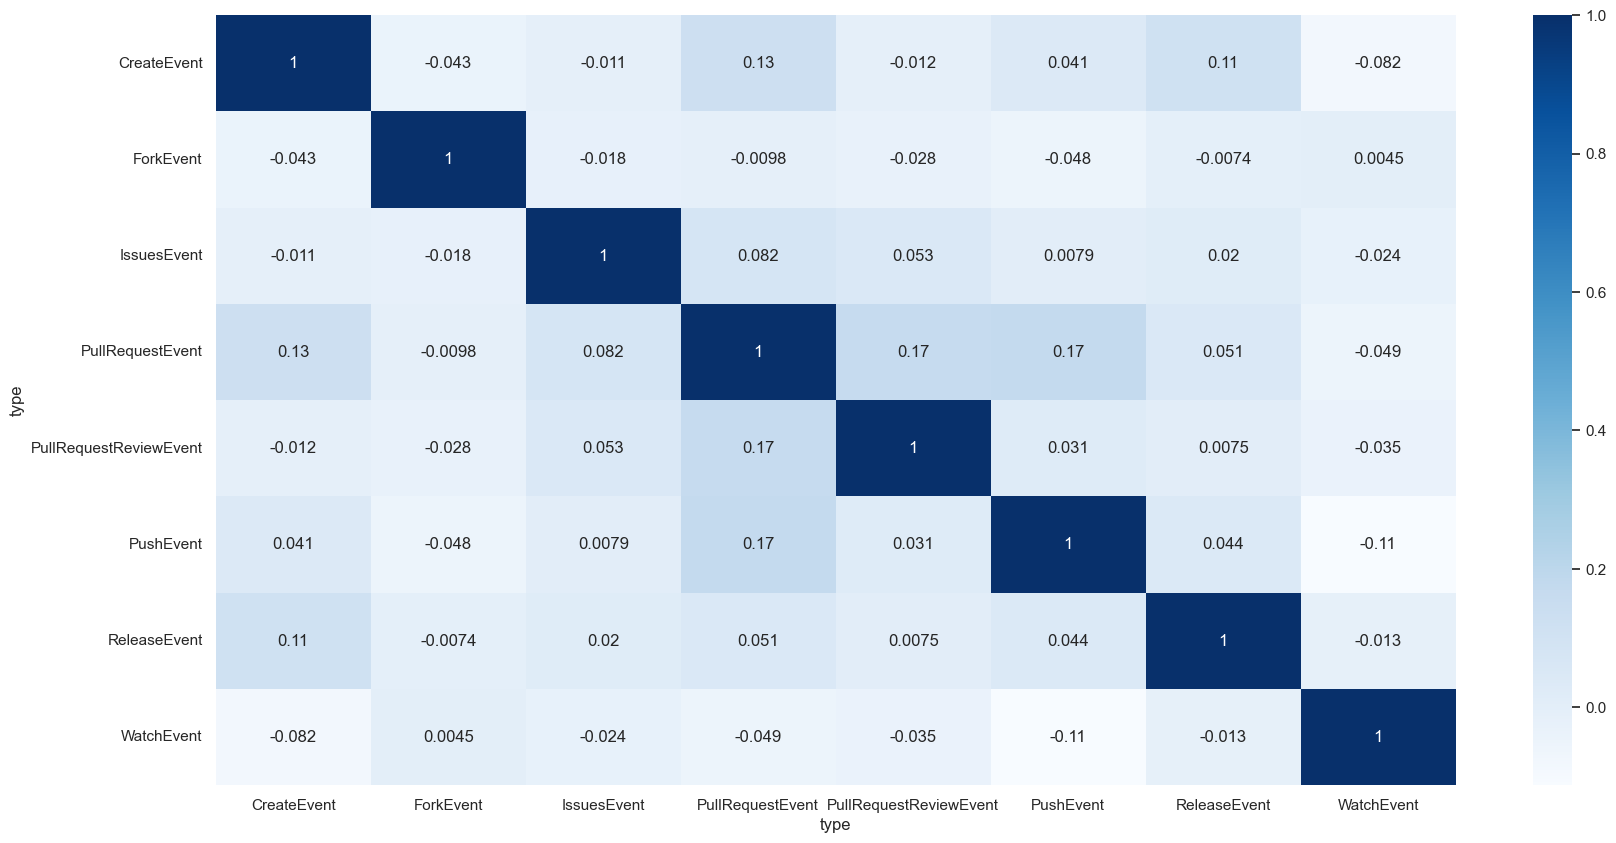

In [15]:
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [16]:
pivot_df.to_csv('../data/processed/processed_ml.csv')